In [31]:
%matplotlib inline
import datetime as datetime
import json
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
plt.style.use("bmh")
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = '14'
import nltk
import nltk.sentiment.vader as vd
from nltk import download
import numpy as np
import pandas as pd

## Loading DataFrames

In [2]:
udf = pd.read_pickle('Your/Data/Path/tweaked_user_dataframe.pkl')
udf

,location,id,name,verified,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,country
0,"Waiyaki Way, Westlands",697374646614781952,AACC-CETA,False,1565,666,2795,Kenya
1,NaN,87371572,ACNA,False,9023,1796,3393,NaN
2,Anglican Communion Office,903497472,Anglican Alliance,False,2291,1195,3599,United Kingdom
3,Rome,761714520,Anglican Centre Rome,False,2681,839,1733,Italia
4,"Nairobi, Kenya",1020255964044328961,Anglican Church of Kenya,False,1095,185,567,Kenya
...,...,...,...,...,...,...,...,...
166,"Federal Way, WA",11859822,World Vision USA,True,554386,14283,92602,Sénégal
164,"Plot 15B Nakasero, Kampala",759998299,World Vision Uganda,False,4278,580,3375,United Kingdom
167,"Dakar, Senegal",830807449,World Vision West Africa,False,2245,563,2088,United States
157,"Addis Ababa, Ethiopia",2231308272,WorldVision Ethiopia,False,1958,178,420,België / Belgique / Belgien


In [3]:
df = pd.read_pickle('Your/Data/Path/tweet_dataframe_p5.pkl')
df

,author_id,text,lang,referenced_tweets,reply_settings,conversation_id,id,created_at,entities.mentions,entities.annotations,...,entities.urls,in_reply_to_user_id,geo.place_id,geo.coordinates.type,geo.coordinates.coordinates,withheld.copyright,withheld.country_codes,withheld.scope,entities.cashtags,text_processed
0,697374646614781952,RT @AWalkerSmith7: @AaccCeta @ArchbishopSapit ...,en,"[{'type': 'retweeted', 'id': '1437029861676228...",everyone,1437051433480753156,1437051433480753156,2021-09-12 13:52:15+00:00,"[{'start': 3, 'end': 17, 'username': 'AWalkerS...","[{'start': 93, 'end': 95, 'probability': 0.919...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[thanking, god, historic, moment, church, hist..."
1,697374646614781952,RT @sceptwic: Another important step in road t...,en,"[{'type': 'retweeted', 'id': '1437043141979295...",everyone,1437051325255192582,1437051325255192582,2021-09-12 13:51:49+00:00,"[{'start': 3, 'end': 12, 'username': 'sceptwic...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[another, important, step, road, #justicedigni..."
2,697374646614781952,Congratulations Ven Rose Okeno ACK Diocese of ...,en,NaN,everyone,1436979065114800131,1436979065114800131,2021-09-12 09:04:41+00:00,NaN,"[{'start': 16, 'end': 29, 'probability': 0.516...",...,"[{'start': 213, 'end': 236, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[congratulations, ven, rose, okeno, ack, dioce..."
3,697374646614781952,Consecration Service of Ven Rose Okeno ACK Dio...,en,NaN,everyone,1436975615480041473,1436975615480041473,2021-09-12 08:50:59+00:00,NaN,"[{'start': 124, 'end': 147, 'probability': 0.5...",...,"[{'start': 239, 'end': 262, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[consecration, service, ven, rose, okeno, ack,..."
4,697374646614781952,We are looking forward to today’s Consecration...,en,"[{'type': 'replied_to', 'id': '143695708915549...",everyone,1436957089155493889,1436957092787757056,2021-09-12 07:37:22+00:00,NaN,"[{'start': 116, 'end': 124, 'probability': 0.6...",...,NaN,697374646614781952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[looking, forward, today, consecration, enthro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308837,2193947323,In our New Year Message to the Nation we proff...,en,"[{'type': 'quoted', 'id': '1082850893807144962'}]",everyone,1082937561537044480,1082937561537044480,2019-01-09 09:50:09+00:00,NaN,NaN,...,"[{'start': 271, 'end': 294, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[new, year, message, nation, proffered, areas,..."
308838,2193947323,RT @NewsDayZimbabwe: THE @zccinzim has launche...,en,"[{'type': 'retweeted', 'id': '1082932233500065...",everyone,1082934512777117696,1082934512777117696,2019-01-09 09:38:02+00:00,"[{'start': 3, 'end': 19, 'username': 'NewsDayZ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[launched, fresh, bid, broker, dialogue, presi..."
308839,2193947323,We can choose the route of engagement or that ...,en,NaN,everyone,1082904479526240256,1082904479526240256,2019-01-09 07:38:41+00:00,"[{'start': 211, 'end': 227, 'username': 'NewsD...",NaN,...,"[{'start': 183, 'end': 206, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[choose, route, engagement, conflict, route, i..."
308840,2193947323,"For many Zimbabweans, 2019 has come amidst muc...",en,NaN,everyone,1082548265617371137,1082548265617371137,2019-01-08 08:03:13+00:00,"[{'start': 187, 'end': 199, 'username': 'EFZZI...",NaN,...,"[{'start': 264, 'end': 287, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[many, zimbabweans, come, amidst, much, hardsh..."


## Cleanup

In [6]:
# Functions
# --- Drop columns not needed for analysis from tweet DataFrame
def clean_tweet(df):
    return (df
           .drop(columns=[c for c in df.columns if 'entities.cashtags' in c])
           .drop(columns=['id', 'lang', 'in_reply_to_user_id', 'conversation_id',
                          'public_metrics.retweet_count', 'public_metrics.reply_count',
                          'public_metrics.like_count', 'public_metrics.quote_count',
                          'entities.urls',
                          'geo.place_id', 'geo.coordinates.type', 'geo.coordinates.coordinates', 
                          'withheld.copyright', 'withheld.country_codes', 'withheld.scope', 'reply_settings'])
                          )

# --- Modify tweet DataFrame to add new columns needed for analysis
def modify_tweet(df):
    return (clean_tweet(df)
                .assign(is_reply=df['text'].str.startswith('@'),
                   referenced_type=df['referenced_tweets'].apply(lambda t: t[0]['type'] if isinstance(t, list) else np.nan),
                   length=lambda df_:df_.text.str.len(),
                   tweet_count=1,
                   created_truncated=df['created_at'].apply(lambda d: datetime.date(d.year, d.month, d.day)),
                  )
           )

# --- merge modified tweet and user DataFrames
def create_analysis_frame(df1, df2):
    return(modify_tweet(df1)
            .merge(df2, left_on='author_id', right_on='id', how='left')
            .drop(columns = ['id', 'referenced_tweets', 'verified', 'location',
                                'public_metrics.following_count', 'public_metrics.tweet_count'])
            )

# Main
tdf = create_analysis_frame(df, udf)

with pd.option_context('display.max_colwidth', 280):
    display(tdf)

,author_id,text,created_at,entities.mentions,entities.annotations,entities.hashtags,text_processed,is_reply,referenced_type,length,tweet_count,created_truncated,name,public_metrics.followers_count,country
0,697374646614781952,RT @AWalkerSmith7: @AaccCeta @ArchbishopSapit @LesmoreGEzkiel @DrMwaniki @fmwombeki Thanking God 4 this historic moment n church history n Kenya! 2 God b the glory! Ashe! Amen! @Oikoumene @AaccCeta @AdNAUbuntu @JaCouncilChurch @ncccusa @iamepiscopalian @GETIWCC @WCCpaween @An...,2021-09-12 13:52:15+00:00,"[{'start': 3, 'end': 17, 'username': 'AWalkerSmith7', 'id': '1868363888'}, {'start': 19, 'end': 28, 'username': 'AaccCeta', 'id': '697374646614781952'}, {'start': 29, 'end': 45, 'username': 'ArchbishopSapit', 'id': '798412484742959105'}, {'start': 46, 'end': 61, 'username': '...","[{'start': 93, 'end': 95, 'probability': 0.9196, 'type': 'Other', 'normalized_text': 'God'}]",NaN,"[thanking, god, historic, moment, church, history, kenya, god, glory, ashe, amen]",False,retweeted,363,1,2021-09-12,AACC-CETA,1565,Kenya
1,697374646614781952,RT @sceptwic: Another important step in road to #JusticeDignitySolidarity. Kenyan churches leading the way it seems as number of women in #episcopate rises again. @ACK @full_kenya https://t.co/CAPRZdimkq,2021-09-12 13:51:49+00:00,"[{'start': 3, 'end': 12, 'username': 'sceptwic', 'id': '35702398'}]",NaN,"[{'start': 48, 'end': 73, 'tag': 'JusticeDignitySolidarity'}]","[another, important, step, road, #justicedignitysolidarity, kenyan, churches, leading, way, seems, number, women, #episcopate, rises, <-url->]",False,retweeted,203,1,2021-09-12,AACC-CETA,1565,Kenya
2,697374646614781952,Congratulations Ven Rose Okeno ACK Diocese of Butere. The first Woman Diocesan Bishop in the history of the Anglican Church of Kenya. We thank God for the new chapters being written in the history of the Church. https://t.co/6Up7M3cEsb,2021-09-12 09:04:41+00:00,NaN,"[{'start': 16, 'end': 29, 'probability': 0.5163, 'type': 'Person', 'normalized_text': 'Ven Rose Okeno'}, {'start': 108, 'end': 131, 'probability': 0.5879, 'type': 'Place', 'normalized_text': 'Anglican Church of Kenya'}, {'start': 144, 'end': 146, 'probability': 0.976, 'type':...",NaN,"[congratulations, ven, rose, okeno, ack, diocese, butere, first, woman, diocesan, bishop, history, anglican, church, kenya, thank, god, new, chapters, written, history, church, <-url->]",False,NaN,236,1,2021-09-12,AACC-CETA,1565,Kenya
3,697374646614781952,Consecration Service of Ven Rose Okeno ACK Diocese of Butere. She is the first Woman Diocesan Bishop in the history of the Anglican Church of Kenya. New chapters being written in the history of the Church. We thank God for such moments. https://t.co/hzkus3byb5,2021-09-12 08:50:59+00:00,NaN,"[{'start': 124, 'end': 147, 'probability': 0.5667, 'type': 'Place', 'normalized_text': 'Anglican Church of Kenya'}, {'start': 217, 'end': 219, 'probability': 0.9677, 'type': 'Other', 'normalized_text': 'God'}]",NaN,"[consecration, service, ven, rose, okeno, ack, diocese, butere, first, woman, diocesan, bishop, history, anglican, church, kenya, new, chapters, written, history, church, thank, god, moments, <-url->]",False,NaN,262,1,2021-09-12,AACC-CETA,1565,Kenya
4,697374646614781952,We are looking forward to today’s Consecration and Enthronement of the first Woman Bishop in The Anglican Church of Kenya Ven. Rose Okeno.,2021-09-12 07:37:22+00:00,NaN,"[{'start': 116, 'end': 124, 'probability': 0.6155, 'type': 'Place', 'normalized_text': 'Kenya Ven'}, {'start': 127, 'end': 136, 'probability': 0.8553, 'type': 'Person', 'normalized_text': 'Rose Okeno'}]",NaN,"[looking, forward, today, consecration, enthronement, first, woman, bishop, anglican, church, kenya, ven, rose, okeno]",False,replied_to,138,1,2021-09-12,AACC-CETA,1565,Kenya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238918,2193947323,In our New Year Message to the Nation we proffered 4 areas that need to be address to avert the possible catastrophe

## Functions

In [7]:
# Functions for preparing the dataframe
# --- Read keywords from file and return them as list
def prepare_keywords(file):
    keys = pd.read_csv(file)
    s = ''
    return [(s+word) for word in keys['keywords']]

# --- Create new column with value=1 if keyword is in tweet and value=0 if not
def covid_relation(df, keylist):
    return df.assign(covid_related=df['text_processed'].apply(lambda t: 1 if any(f" {keyword} " in ' '.join(t) for keyword in keylist) else 0))

# --- Create new column by inverting the column created above
def no_covid_relation(df, keylist):
    return df.assign(not_covid_related=df['covid_related'].apply(lambda t: 0 if t==1 else 1))

In [21]:
# Functions for plotting
# --- Detrender removes trends over period to better identify significant short time changes
def detrender(df, periods=None, method=None):
    periods = 30 if periods is None else periods
    func = np.mean if method is None else method

    return df - df.rolling(periods).apply(func)

# --- Put the data in the dataframe in units of deviation from the mean.
def standardize(df):
    return (df - df.mean()) / df.std()

# --- Plots input dataframe and adds lines for sigma-levels 1 to 3
def make_normalplot(df, random=True):
    if random:
        plt.plot(df.index.values,
                 np.random.normal(size=df.shape[0]),
                 lw=0.8,
                 alpha=0.75)
        plt.ylim((-5, 5))
        plt.title("Generated normal time series with $\sigma$ bands")
    else:
        plt.plot(df.index.values, df.values, lw=0.8, alpha=0.75)
        #plt.ylim((-5, 8))
        plt.title("Dataframe with bands showing up to 3 sigma")

    plt.axhline(y=1, color="red")
    plt.axhline(y=-1, color="red")
    plt.axhline(y=2, color="orange")
    plt.axhline(y=-2, color="orange")
    plt.axhline(y=3, color="yellow")
    plt.axhline(y=-3, color="yellow")

    arrowprops = dict(arrowstyle="-",
                      color="black",
                      lw=2)

    #textprops = dict(rotation="vertical", fontsize=16)
    textprops = dict()

    plt.annotate("1 $\sigma$",
                 xy=(df.index.values[10], 1),
                 xytext=(df.index.values[10], -1.5),
                 arrowprops=arrowprops,
                 **textprops)

    plt.annotate("2 $\sigma$",
                 xy=(df.index.values[50], 2),
                 xytext=(df.index.values[50], -2.5),
                 arrowprops=arrowprops,
                 **textprops
                 )

    plt.annotate("3 $\sigma$",
                 xy=(df.index.values[100], 3),
                 xytext=(df.index.values[100], -3.5),
                 arrowprops=arrowprops,
                 **textprops
                 )
        
#make_normalplot(ddf, random=True)

# --- Plot input dataframe and add date_markers
def plot_ts(series,
            ma=False,
            raw=False,
            expanding=False,
            ewma=False,
            overall=False,
            median=False,
            title=None,
            time_bin="hour",
            date_markers=None,
            y_label=None,
            custom_yaxis=None,
            custom_ax=None,
            **kwargs):
    """
    custom plotting function for our time-series dataframes. 
    Args:
        series: pd.Series or pd.Dataframe
        raw: plot the basic values in the frame
        expanding: plot an expanding mean
        ewma: plot an ewma line
        overall: plot an overall mean
        median: plot the overall median
        title: custom title to use
        time_bin: marks the y-axis correctly
        date_markers: plots a dot on the signal where a given date is noted.
        y_label: custom y-axis label
        custom_yaxis: custom axis
        custom_ax: passing a custom Axes here will assign this plot to that
                   axis
   """
    if isinstance(series, pd.DataFrame):
        series = series["counts"]

    lw = 0.75
    if custom_ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)
    else:
        ax = custom_ax

    if y_label is None:
        period = series.index.to_period().freqstr
        _bin = "day" if period == "D" else "hour"
        _y_label = "tweets per {}".format(_bin)
        plt.ylabel(_y_label)
    else:
        if isinstance(y_label, str):
            plt.ylabel(y_label)

    if date_markers is not None:
        def dateindex_to_str(index, include_hour=True):
            idx = 16 if include_hour else 10
            return [str(date)[0:idx].replace("T", " ")
                    for date in index.values]

        (ax.plot(date_markers, series.loc[date_markers],
                 "o", markersize=4, color='m', label="point"))

    if raw:
        series.plot(label="raw", lw=lw, ax=ax)

    if ma:
        (series.rolling(ma).mean()
         .plot(ax=ax, label="{}{} ma".format(ma, time_bin), lw=lw))

    if ewma:
        if isinstance(ewma, int):
            (series.ewm(span=ewma).mean()
             .plot(ax=ax, label="emwa - span {}".format(ewma), lw=lw))
        else:
            (series.ewm(alpha=0.05).mean()
             .plot(ax=ax, label="emwa, $\alpha = 0.05$", lw=lw))

    if expanding:
        series.expanding().mean().plot(ax=ax, label="expanding_mean", lw=lw)

    if overall:
        (pd.DataFrame(series)
         .assign(global_mean=lambda x: x['count']
                 .mean())["global_mean"]
         .plot(ax=ax, label="global_mean", lw=lw))

    if median:
        (pd.DataFrame(series)
         .assign(global_median=lambda x: x['count'].median())["global_median"]
         .plot(ax=ax, label="global_median"))

    plt.tight_layout()
    plt.xlabel("datetime")

    if custom_yaxis is not None:
        def log_axis(x, pos):
            'The two args are the value and tick position'
            str_ = '$' + "2^{" + str(x) + "}" + '$'
            return str_
        formatter = FuncFormatter(log_axis)
        ax.yaxis.set_major_formatter(formatter)

    if title:
        ax.set_title(title)
    if custom_ax is not None:
        return
    else:
        return ax

#plt.rcParams["figure.figsize"] = (20,5)
#plot_ts(ddf, raw=True, title="$ln$ transformed standardized $\Delta$ Tweets from previous hour")

## Analysis Hypothesis A1.3

##### Import keywords

In [8]:
# Load keywords identified in the "Coronavirus (COVID-19) Tweets Dataset" by Lamsal
keylist = prepare_keywords('keywords.txt')
keylist

['corona',
 '#corona',
 'coronavirus',
 '#coronavirus',
 'covid',
 '#covid',
 'covid19',
 '#covid19',
 'covid-19',
 '#covid-19',
 'sarscov2',
 '#sarscov2',
 'sars cov2',
 'sars cov 2',
 'covid_19',
 '#covid_19',
 '#ncov',
 'ncov',
 '#ncov2019',
 'ncov2019',
 '2019-ncov',
 '#2019-ncov',
 'pandemic',
 '#pandemic',
 '#2019ncov',
 '2019ncov',
 'quarantine',
 '#quarantine',
 'flatten the curve',
 'flattening the curve',
 '#flatteningthecurve',
 '#flattenthecurve',
 'hand sanitizer',
 '#handsanitizer',
 '#lockdown',
 'lockdown',
 'social distancing',
 '#socialdistancing',
 'work from home',
 '#workfromhome',
 'working from home',
 '#workingfromhome',
 'ppe',
 'n95',
 '#ppe',
 '#n95',
 '#covidiots',
 'covidiots',
 'herd immunity',
 '#herdimmunity',
 'pneumonia',
 '#pneumonia',
 'chinese virus',
 '#chinesevirus',
 'wuhan virus',
 '#wuhanvirus',
 'kung flu',
 '#kungflu',
 'wearamask',
 '#wearamask',
 'wear a mask',
 'vaccine',
 'vaccines',
 '#vaccine',
 '#vaccines',
 'corona vaccine',
 'corona 

##### Check tweets for COVID-keywords

In [9]:
# Drop columns not needed for this analysis,
# then check if tweet contains COVID keywords
# and add inversion of check as another column
ctdf = (tdf
       .drop(columns=['author_id', 'text', 'created_truncated', 'referenced_type',
                      'entities.mentions', 'entities.annotations', 'entities.hashtags',
                      'is_reply', 'length', 'public_metrics.followers_count'])
       .pipe(covid_relation, keylist)
       .pipe(no_covid_relation, keylist)
      )
ctdf

,created_at,text_processed,tweet_count,name,country,covid_related,not_covid_related
0,2021-09-12 13:52:15+00:00,"[thanking, god, historic, moment, church, hist...",1,AACC-CETA,Kenya,0,1
1,2021-09-12 13:51:49+00:00,"[another, important, step, road, #justicedigni...",1,AACC-CETA,Kenya,0,1
2,2021-09-12 09:04:41+00:00,"[congratulations, ven, rose, okeno, ack, dioce...",1,AACC-CETA,Kenya,0,1
3,2021-09-12 08:50:59+00:00,"[consecration, service, ven, rose, okeno, ack,...",1,AACC-CETA,Kenya,0,1
4,2021-09-12 07:37:22+00:00,"[looking, forward, today, consecration, enthro...",1,AACC-CETA,Kenya,0,1
...,...,...,...,...,...,...,...
238918,2019-01-09 09:50:09+00:00,"[new, year, message, nation, proffered, areas,...",1,Zimbabwe Council of Churches,NaN,0,1
238919,2019-01-09 09:38:02+00:00,"[launched, fresh, bid, broker, dialogue, presi...",1,Zimbabwe Council of Churches,NaN,0,1
238920,2019-01-09 07:38:41+00:00,"[choose, route, engagement, conflict, route, i...",1,Zimbabwe Council of Churches,NaN,0,1
238921,2019-01-08 08:03:13+00:00,"[many, zimbabweans, come, amidst, much, hardsh...",1,Zimbabwe Council of Churches,NaN,0,1


#### Prepare sentiment analysis by assigning sentiment

In [13]:
''' Download lexicon providing sentiment values
VADER (Valence Aware Dictionary and sEntiment Reasoner) was chosen
because it is a lexicon and rule-based sentiment analysis tool 
that is specifically attuned to sentiments expressed in social media.
'''
download('vader_lexicon')
sia = vd.SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\johan\AppData\Roaming\nltk_data...


In [15]:
# Assign each tweet a sentiment value using VADER
ctdf = (ctdf
       .assign(sentiment=ctdf['text_processed'].apply(lambda t: sum([sia.polarity_scores(word)['compound'] for word in t])))
      )
ctdf

,created_at,text_processed,tweet_count,name,country,covid_related,not_covid_related,sentiment
0,2021-09-12 13:52:15+00:00,"[thanking, god, historic, moment, church, hist...",1,AACC-CETA,Kenya,0,1,1.0887
1,2021-09-12 13:51:49+00:00,"[another, important, step, road, #justicedigni...",1,AACC-CETA,Kenya,0,1,0.2795
2,2021-09-12 09:04:41+00:00,"[congratulations, ven, rose, okeno, ack, dioce...",1,AACC-CETA,Kenya,0,1,1.2338
3,2021-09-12 08:50:59+00:00,"[consecration, service, ven, rose, okeno, ack,...",1,AACC-CETA,Kenya,0,1,0.6344
4,2021-09-12 07:37:22+00:00,"[looking, forward, today, consecration, enthro...",1,AACC-CETA,Kenya,0,1,0.0000
...,...,...,...,...,...,...,...,...
238918,2019-01-09 09:50:09+00:00,"[new, year, message, nation, proffered, areas,...",1,Zimbabwe Council of Churches,NaN,0,1,0.0875
238919,2019-01-09 09:38:02+00:00,"[launched, fresh, bid, broker, dialogue, presi...",1,Zimbabwe Council of Churches,NaN,0,1,-1.0759
238920,2019-01-09 07:38:41+00:00,"[choose, route, engagement, conflict, route, i...",1,Zimbabwe Council of Churches,NaN,0,1,0.9470
238921,2019-01-08 08:03:13+00:00,"[many, zimbabweans, come, amidst, much, hardsh...",1,Zimbabwe Council of Churches,NaN,0,1,-1.0797


##### Analyse daily sentiment via timeseries

In [16]:
# Grouping the tweets by day
# and calculating the average daily sentiment value
ddf =(ctdf
      .set_index('created_at')
      .sort_index()
      .sentiment
      .resample('d')
      .mean()
      .to_frame(name='counts')
     )
ddf

,counts
created_at,
2019-01-01 00:00:00+00:00,0.590257
2019-01-02 00:00:00+00:00,0.447893
2019-01-03 00:00:00+00:00,0.418654
2019-01-04 00:00:00+00:00,0.449840
2019-01-05 00:00:00+00:00,0.407939
...,...
2021-09-08 00:00:00+00:00,0.532964
2021-09-09 00:00:00+00:00,0.467124
2021-09-10 00:00:00+00:00,0.396848


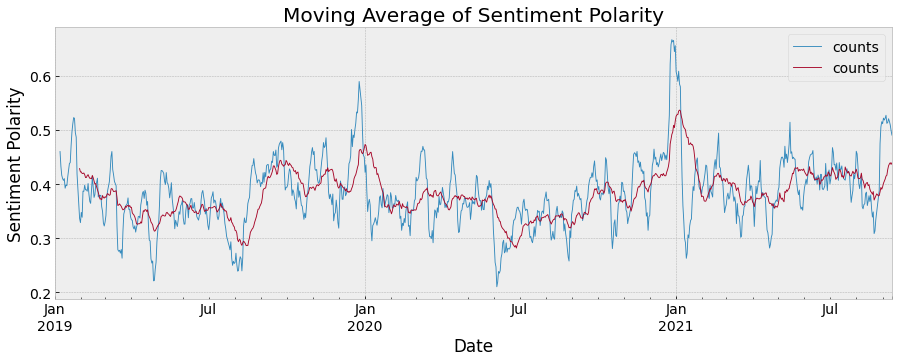

In [19]:
# First overview timeseries plots with
# 7day (blue) and 30day (red) rolling average windows

fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (15, 5))

(ddf
 .rolling(7)
 .mean()
 .plot(ax=axes, lw=0.9, label='1W SMA Tweets'));

(ddf
 .rolling(30)
 .mean()
 .plot(ax=axes, lw=0.9, label='1W SMA Tweets'));

axes.set_xlabel('Date')
axes.set_ylabel('Sentiment Valence')
axes.set_title('Moving Average of Sentiment Valence')
plt.savefig('A1_3 Timeseries Sentiment.png', bbox_inches='tight')

c:\Users\johan\anaconda3\envs\vw_project_env\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


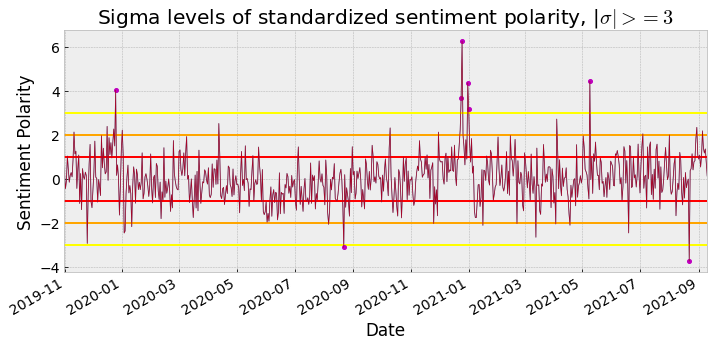

In [23]:
# Configure sigma-level threshold and plot size
UNIT_THRESHOLD = 3
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (10, 5))

# Create first layer in plot - Plot sigma-level sentiment change
(ddf
 #.pipe(np.log)
 .pipe(standardize)
 .pipe(make_normalplot, random=False)
)

# Create second layer in plot - Plot same graph as in first layer but instead of sigma-level
# add date_markers showing all dates that are above a sigma-level 3 threshold
plot_ts(ddf
        .pipe(standardize),
        raw=True,
        title=f"Sigma levels of standardized sentiment polarity, |$\sigma| >={UNIT_THRESHOLD}$",
        custom_ax=axes,
        date_markers=(ddf
                      .pipe(standardize)
                      .query("counts >= @UNIT_THRESHOLD | counts <= -@UNIT_THRESHOLD")
                      .index));

axes.set_xlim(18200, 18880)
axes.set_xlabel('Date')
axes.set_ylabel('Sentiment Polarity')
plt.savefig('A1_3 Analysis of significance of sentiment polarity Sigma levels.png', bbox_inches='tight')

##### Analyse Sentiment related to vs. not related to COVID-19

In [25]:
# Reduce initial dataframe to tweets related to COVID and
# create series with daily sentiment values 
cddf =(ctdf[ctdf['covid_related'] == 1]
       .set_index('created_at')
       .sort_index()
       .sentiment
       .resample('d')
       .mean()
       .dropna()
      )
cddf

created_at
2019-01-28 00:00:00+00:00    0.570800
2019-02-15 00:00:00+00:00   -0.832400
2019-02-16 00:00:00+00:00    0.440400
2019-02-19 00:00:00+00:00    0.557400
2019-03-05 00:00:00+00:00    0.517900
                               ...   
2021-09-08 00:00:00+00:00   -0.082025
2021-09-09 00:00:00+00:00    0.491712
2021-09-10 00:00:00+00:00    0.437213
2021-09-11 00:00:00+00:00    0.028700
2021-09-12 00:00:00+00:00    1.028875
Name: sentiment, Length: 672, dtype: float64

In [26]:
# Reduce initial dataframe to tweets NOT related to COVID and
# create series with daily sentiment values 

ncddf =(ctdf[ctdf['not_covid_related'] == 1]
       .set_index('created_at')
       .sort_index()
       .sentiment
       .resample('d')
       .mean()
       .dropna()
      )
ncddf

created_at
2019-01-01 00:00:00+00:00    0.590257
2019-01-02 00:00:00+00:00    0.447893
2019-01-03 00:00:00+00:00    0.418654
2019-01-04 00:00:00+00:00    0.449840
2019-01-05 00:00:00+00:00    0.407939
                               ...   
2021-09-08 00:00:00+00:00    0.558065
2021-09-09 00:00:00+00:00    0.466043
2021-09-10 00:00:00+00:00    0.395288
2021-09-11 00:00:00+00:00    0.436276
2021-09-12 00:00:00+00:00    0.538849
Freq: D, Name: sentiment, Length: 986, dtype: float64

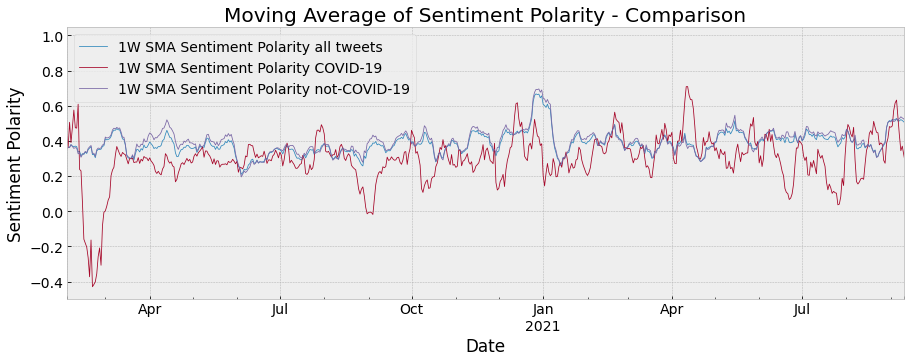

In [27]:
# First timeseries comparison of non-COVID-related and COVID-related sentiment

# Configure plot size
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (15, 5))

# Create plot with overall daily sentiment (blue)
(ddf
 .rolling(7)
 .mean()
 .plot(ax=axes, lw=0.8));

# Create plot with COVID-related daily sentiment (red)
(cddf
 .rolling(7)
 .mean()
 .plot(ax=axes, lw=0.8));

# Create plot with non-COVID-related daily sentiment (purple)
(ncddf
 .rolling(7)
 .mean()
 .plot(ax=axes, lw=0.8));


axes.legend(["1W SMA Sentiment Valence all tweets", 
             "1W SMA Sentiment Valence COVID-19", 
             "1W SMA Sentiment Valence not-COVID-19"])
axes.set_xlim(18295, 18880)
axes.set_xlabel('Date')
axes.set_ylabel('Sentiment Valence')
axes.set_title('Moving Average of Sentiment Valence - Comparison')
plt.savefig('A1_3 Moving Average Sentiment comparison.png', bbox_inches='tight')

##### Calculation of overall sentiment values

In [28]:
# Average sentiment of whole dataset
ctdf['sentiment'].mean()

0.38006342503650475

In [29]:
# Average sentiment of COVID-related tweets
(ctdf[ctdf['covid_related']==1]
 .sentiment
 .mean()
)


0.29390757189854694

In [35]:
# Average sentiment of non-COVID-related tweets
(ctdf[ctdf['covid_related']==0]
 .sentiment
 .mean()
)

0.3874412664658278

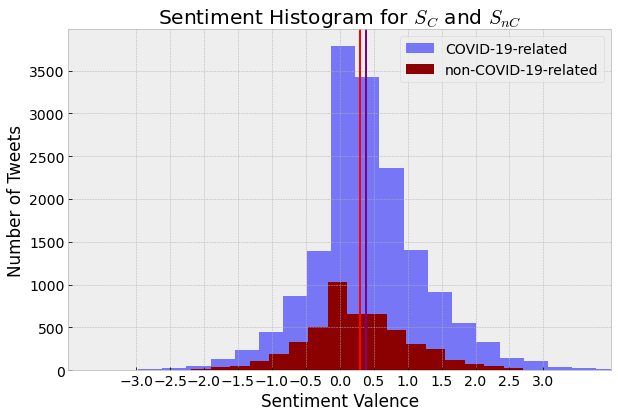

In [30]:
# Visual representation of average sentiment
# showing a histogram of the sentiment during crisis onset

# Configure plot size
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (10, 7));
fig.tight_layout(pad=5.0)

# Plot sentiment histogram for not COVID-related tweets
(ctdf[(ctdf['not_covid_related']==1)]
 .loc[(ctdf['created_at'] >= '2020-02-15') &
      (ctdf['created_at'] < '2020-05-01')]
 .sort_values(by=['sentiment'])
 .sentiment
 .plot
 .hist(title="Sentiment Histogram for COVID-related tweets", bins = 30, lw=3, fc=(0, 0, 1, 0.5))
)

# Plot sentiment histogram for COVID-related  tweets
(ctdf[(ctdf['covid_related']==1)]
 .loc[(ctdf['created_at'] >= '2020-02-15') &
      (ctdf['created_at'] < '2020-05-01')]
 .sort_values(by=['sentiment'])
 .sentiment
 .plot
 .hist(title=r"Sentiment Histogram for $S_{C}$ and $S_{nC}$", bins = 30, lw=3, color='darkred')
)

# Configure axis and save plot
axes.set_xticks(np.arange(-3,3.5, step=0.5))
axes.set_xlim(-4, 4)
axes.axvline(x=0.293, ymin=0, ymax=1200, color='red')
axes.axvline(x=0.387, ymin=0, ymax=1200, color='purple')
axes.legend(['COVID-19-related', 'non-COVID-19-related'])
axes.set_xlabel('Sentiment Valence')
axes.set_ylabel('Number of Tweets')
plt.savefig('A1_3 Histogram Sentiment Valence comparison.png', bbox_inches='tight')